# Figure 2a - X chromosomal genes showing inactivation, escape from inactivation or variable escape

Percentage is shown for the entire set of 631 investigated X chromosomal genes, as well as the subsets of 248 genes with differential expression (DE) and 166 with at least one AS event. P-values were derived with Fisher’s exact test comparing genes with DE or AS to the entire set of 631 genes

## Loading dependencies

In [111]:
install.packages("viridis")
library(viridis)
library(ggplot2)
library(magrittr)
Sys.setenv(TAR = "/bin/tar") # for gzfile

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: viridisLite

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



## Read in the rMATS results for parsing the gencode or other GTF

rMATS 3.2.5 parses the annotation file, gencode v.30 in this example, and creates the SE, RI, MXE, A3SS, A5SS events.

In [112]:
# a code block
getwd()
fromGTFSE.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.SE.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFSE.dat$AStype <- 'SE'
fromGTFRI.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.RI.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFRI.dat$AStype <- 'RI'
fromGTFMXE.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.MXE.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFMXE.dat$AStype <- 'MXE'
fromGTFA5SS.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.A5SS.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFA5SS.dat$AStype <- 'A5SS'
fromGTFA3SS.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.A3SS.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFA3SS.dat$AStype <- 'A3SS'

head(fromGTFSE.dat)
head(fromGTFMXE.dat)
head(fromGTFRI.dat)
head(fromGTFA3SS.dat)
head(fromGTFA5SS.dat)

[1] "/mnt/shared/ec2-user/session_data/sbas/jupyter"

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000034152.18,MAP2K3,chr17,+,21287990,21288091,21284709,21284969,21295674,21295769,SE
2,2,ENSG00000034152.18,MAP2K3,chr17,+,21303182,21303234,21302142,21302259,21304425,21304553,SE
3,3,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21287990,21288091,21296085,21296143,SE
4,4,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21287990,21288091,21298412,21298479,SE
5,5,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21284710,21284969,21296085,21296143,SE
6,6,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21284710,21284969,21298412,21298479,SE


,ID,GeneID,geneSymbol,chr,strand,X1stExonStart_0base,X1stExonEnd,X2ndExonStart_0base,X2ndExonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000114062.19,UBE3A,chr15,-,25407066,25407262,25408619,25408684,25405460,25405502,25409087,25409207,MXE
2,2,ENSG00000181790.11,ADGRB1,chr8,+,142524237,142524304,142526541,142526627,142522640,142522710,142533294,142533466,MXE
3,3,ENSG00000159256.13,MORC3,chr21,+,36380230,36380318,36380625,36380682,36377409,36377507,36384729,36384829,MXE
4,4,ENSG00000077232.18,DNAJC10,chr2,+,182752548,182752623,182754702,182754805,182752071,182752188,182755002,182755104,MXE
5,5,ENSG00000149809.14,TM7SF2,chr11,+,65113219,65113414,65113490,65113594,65112810,65112865,65114712,65114832,MXE
6,6,ENSG00000149809.14,TM7SF2,chr11,+,65112810,65112865,65113219,65113414,65112514,65112711,65113490,65113594,MXE


,ID,GeneID,geneSymbol,chr,strand,riExonStart_0base,riExonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000160223.17,ICOSLG,chr21,-,44226833,44230089,44226833,44229044,44230053,44230089,RI
2,2,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230933,161231116,161231245,RI
3,3,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230918,161231116,161231245,RI
4,4,ENSG00000114062.19,UBE3A,chr15,-,25333727,25340228,25333727,25339257,25340084,25340228,RI
5,5,ENSG00000100359.21,SGSM3,chr22,+,40408932,40409372,40408932,40409018,40409249,40409372,RI
6,6,ENSG00000100359.21,SGSM3,chr22,+,40408932,40409372,40408932,40409018,40409339,40409372,RI


,ID,GeneID,geneSymbol,chr,strand,longExonStart_0base,longExonEnd,shortES,shortEE,flankingES,flankingEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000034152.18,MAP2K3,chr17,+,21300470,21300658,21300544,21300658,21298877,21298926,A3SS
2,2,ENSG00000160223.17,ICOSLG,chr21,-,44222990,44229044,44222990,44223078,44230053,44230089,A3SS
3,3,ENSG00000143257.11,NR1I3,chr1,-,161230812,161230933,161230812,161230918,161231116,161231245,A3SS
4,4,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230918,161231328,161231474,A3SS
5,5,ENSG00000143257.11,NR1I3,chr1,-,161230812,161230933,161230812,161230918,161231328,161231474,A3SS
6,6,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230933,161231328,161231474,A3SS


,ID,GeneID,geneSymbol,chr,strand,longExonStart_0base,longExonEnd,shortES,shortEE,flankingES,flankingEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000125166.13,GOT2,chr16,-,58722118,58722278,58722149,58722278,58719195,58719255,A5SS
2,2,ENSG00000130182.8,ZSCAN10,chr16,-,3092541,3093004,3092676,3093004,3091763,3091828,A5SS
3,3,ENSG00000143257.11,NR1I3,chr1,-,161236458,161236598,161236529,161236598,161235846,161235977,A5SS
4,4,ENSG00000154265.16,ABCA5,chr17,-,69273942,69274128,69273958,69274128,69271161,69271289,A5SS
5,5,ENSG00000035928.16,RFC1,chr4,-,39351347,39351476,39351431,39351476,39345400,39345476,A5SS
6,6,ENSG00000127249.15,ATP13A4,chr3,-,193440489,193440637,193440557,193440637,193439022,193439065,A5SS


In [113]:
summaryAS.df <- rbind(fromGTFSE.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFRI.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFMXE.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFA5SS.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFA3SS.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")])

In [114]:
chr_specific_splicing_SE <- table(summaryAS.df$chr[summaryAS.df$AStype == "SE"])
a_chr_SE <- unclass(chr_specific_splicing_SE)
a_chr_SE
chr_specific_splicing_RI <- table(summaryAS.df$chr[summaryAS.df$AStype == "RI"])
a_chr_RI <- unclass(chr_specific_splicing_RI)
a_chr_RI
chr_specific_splicing_MXE <- table(summaryAS.df$chr[summaryAS.df$AStype == "MXE"])
a_chr_MXE <- unclass(chr_specific_splicing_MXE)
a_chr_MXE
chr_specific_splicing_A3SS <- table(summaryAS.df$chr[summaryAS.df$AStype == "A3SS"])
a_chr_A3SS <- unclass(chr_specific_splicing_A3SS)
a_chr_A3SS
chr_specific_splicing_A5SS <- table(summaryAS.df$chr[summaryAS.df$AStype == "A5SS"])
a_chr_A5SS <- unclass(chr_specific_splicing_A5SS)
table(summaryAS.df$chr[summaryAS.df$AStype == "A5SS"])
a_chr_A5SS

chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
 3812  1458  2541  2540   663  1551  1544  2039  2538   742  2552  3547   939 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY 
  493   895  2938  1803  1863  1890  2053  1636  1313  1134   127

chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
  604   117   475   423    46   241   191   441   541    40   637   327   153 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY 
   64   194   371   133   181   284   250   185   192   207    15

chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
  286   120   152   166    46   109    97   137   154    70   116   386    67 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY 
   40    49   205   144   127   155   106   104    74    61     8

chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
  862   230   643   552   108   304   326   537   626   118   783   578   241 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY 
   85   246   514   260   337   388   377   255   264   269    17


 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
  496   155   386   354    59   212   188   348   410    74   400   387   135 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY 
   60   129   368   184   210   216   284   166   162   191    10 

chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
  496   155   386   354    59   212   188   348   410    74   400   387   135 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY 
   60   129   368   184   210   216   284   166   162   191    10

In [188]:
chr_splicing_dist <- rbind(cbind(data.matrix(a_chr_SE),   chr=names(a_chr_SE),  AStype = "SE"),
                           cbind(data.matrix(a_chr_RI),   chr=names(a_chr_RI),  AStype = "RI"),
                           cbind(data.matrix(a_chr_MXE),  chr=names(a_chr_MXE), AStype = "MXE"),
                           cbind(data.matrix(a_chr_A3SS), chr=names(a_chr_A3SS),AStype = "A3SS"),
                           cbind(data.matrix(a_chr_A5SS), chr=names(a_chr_A5SS),AStype = "A5SS"))
colnames(chr_splicing_dist)=c("Counts","Chr","AStype")
counts <- chr_splicing_dist[,"Counts"]
chr_splicing_df <- data.frame(chr_splicing_dist)
head(chr_splicing_df)
chr_splicing_df$Counts <- as.integer(counts)
head(chr_splicing_df)
head(chr_splicing_df$Counts)

,Counts,Chr,AStype
,<fct>,<fct>,<fct>
chr1,3812,chr1,SE
chr10,1458,chr10,SE
chr11,2541,chr11,SE
chr12,2540,chr12,SE
chr13,663,chr13,SE
chr14,1551,chr14,SE


,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr10,1458,chr10,SE
chr11,2541,chr11,SE
chr12,2540,chr12,SE
chr13,663,chr13,SE
chr14,1551,chr14,SE


[1] 3812 1458 2541 2540  663 1551

In [189]:
dim(chr_splicing_dist)

[1] 120   3

In [190]:
chromosomes <- names(a_chr_SE)
chromosomes <- chromosomes[order(chromosomes)]
chromosomes

[1] "chr1"  "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17"
[10] "chr18" "chr19" "chr2"  "chr20" "chr21" "chr22" "chr3"  "chr4"  "chr5" 
[19] "chr6"  "chr7"  "chr8"  "chr9"  "chrX"  "chrY"

In [147]:
colnames(chr_splicing_dist)

[1] "Counts" "Chr"    "AStype"

In [195]:
chr_splicing_df[chr_splicing_df$Chr==chromosomes[1],]

,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr1.1,604,chr1,RI
chr1.2,286,chr1,MXE
chr1.3,862,chr1,A3SS
chr1.4,496,chr1,A5SS


[1] "chr1"    "chr10"   "chr11"   "chr12"   "chr13"   "chr14"   "chr15"  
  [8] "chr16"   "chr17"   "chr18"   "chr19"   "chr2"    "chr20"   "chr21"  
 [15] "chr22"   "chr3"    "chr4"    "chr5"    "chr6"    "chr7"    "chr8"   
 [22] "chr9"    "chrX"    "chrY"    "chr1.1"  "chr10.1" "chr11.1" "chr12.1"
 [29] "chr13.1" "chr14.1" "chr15.1" "chr16.1" "chr17.1" "chr18.1" "chr19.1"
 [36] "chr2.1"  "chr20.1" "chr21.1" "chr22.1" "chr3.1"  "chr4.1"  "chr5.1" 
 [43] "chr6.1"  "chr7.1"  "chr8.1"  "chr9.1"  "chrX.1"  "chrY.1"  "chr1.2" 
 [50] "chr10.2" "chr11.2" "chr12.2" "chr13.2" "chr14.2" "chr15.2" "chr16.2"
 [57] "chr17.2" "chr18.2" "chr19.2" "chr2.2"  "chr20.2" "chr21.2" "chr22.2"
 [64] "chr3.2"  "chr4.2"  "chr5.2"  "chr6.2"  "chr7.2"  "chr8.2"  "chr9.2" 
 [71] "chrX.2"  "chrY.2"  "chr1.3"  "chr10.3" "chr11.3" "chr12.3" "chr13.3"
 [78] "chr14.3" "chr15.3" "chr16.3" "chr17.3" "chr18.3" "chr19.3" "chr2.3" 
 [85] "chr20.3" "chr21.3" "chr22.3" "chr3.3"  "chr4.3"  "chr5.3"  "chr6.3" 
 [92] "chr7.3"  "chr8.3"  "chr9.3"  "chrX.3"  "chrY.3"  "chr1.4"  "chr10.4"
 [99] "chr11.4" "chr12.4" "chr13.4" "chr14.4" "chr15.4" "chr16.4" "chr17.4"
[106] "chr18.4" "chr19.4" "chr2.4"  "chr20.4" "chr21.4" "chr22.4" "chr3.4" 
[113] "chr4.4"  "chr5.4"  "chr6.4"  "chr7.4"  "chr8.4"  "chr9.4"  "chrX.4" 
[120] "chrY.4"

In [198]:
chr_splicing_df$Chr
sum(chr_splicing_df[chr_splicing_df$Chr ==chromosomes[1],"Counts"])

chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY  chr1 chr10 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY  chr1 chr10 
chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 chr21 chr22 
chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 chr21 chr22 
 chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY  chr1 chr10 chr11 chr12 
 chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY  chr1 chr10 chr11 chr12 
chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 chr21 chr22  chr3  chr4 
chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 chr21 chr22  chr3  chr4 
 chr5  chr6  chr7  chr8  chr9  chrX  chrY  chr1 chr10 chr11 chr12 chr13 chr14 
 chr5  chr6  chr7  chr8  chr9  chrX  chrY  chr1 chr10 chr11 chr12 chr13 chr14 
chr15 chr16 chr17 chr18 chr19  chr2 chr20 chr21 chr22  chr3  chr4  chr5  chr6 
chr15 chr16 chr17 chr18 chr19  chr2 chr20 chr21 chr22  chr3  chr4  chr5  chr6 
 chr7  chr8  chr9  chrX  chrY  chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 
 chr7  chr8  chr9  chrX  chrY  chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 
chr17 chr18 chr19  chr2 chr20 chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8 
chr17 chr18 chr19  chr2 chr20 chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8 
 chr9  chrX  chrY 
 chr9  chrX  chrY 
24 Levels: chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 ... chrY

[1] 6060

In [200]:
df_chromosome     <- chr_splicing_df[chr_splicing_df$Chr ==chromosomes[1],]
df_chromosome

,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr1.1,604,chr1,RI
chr1.2,286,chr1,MXE
chr1.3,862,chr1,A3SS
chr1.4,496,chr1,A5SS


In [202]:
percentage <- df_chromosome$Counts/sum(df_chromosome$Counts)*100
percentage

[1] 62.904290  9.966997  4.719472 14.224422  8.184818

In [204]:
df_plot <- data.frame()

for (i in 1:length(chromosomes)) {
    df_chromosome  <- chr_splicing_df[chr_splicing_df$Chr ==chromosomes[i],]
    percentage     <- df_chromosome$Counts/sum(df_chromosome$Counts)*100
    final <- cbind(df_chromosome, Perc=percentage)
    if (i == 1)
        df_plot <- final 
    else
        df_plot <- rbind(df_plot, final)
}  

dim(df_plot)
head(df_plot)

[1] 120   4

,Counts,Chr,AStype,Perc
,<int>,<fct>,<fct>,<dbl>
chr1,3812,chr1,SE,62.904290
chr1.1,604,chr1,RI,9.966997
chr1.2,286,chr1,MXE,4.719472
chr1.3,862,chr1,A3SS,14.224422
chr1.4,496,chr1,A5SS,8.184818
chr10,1458,chr10,SE,70.096154


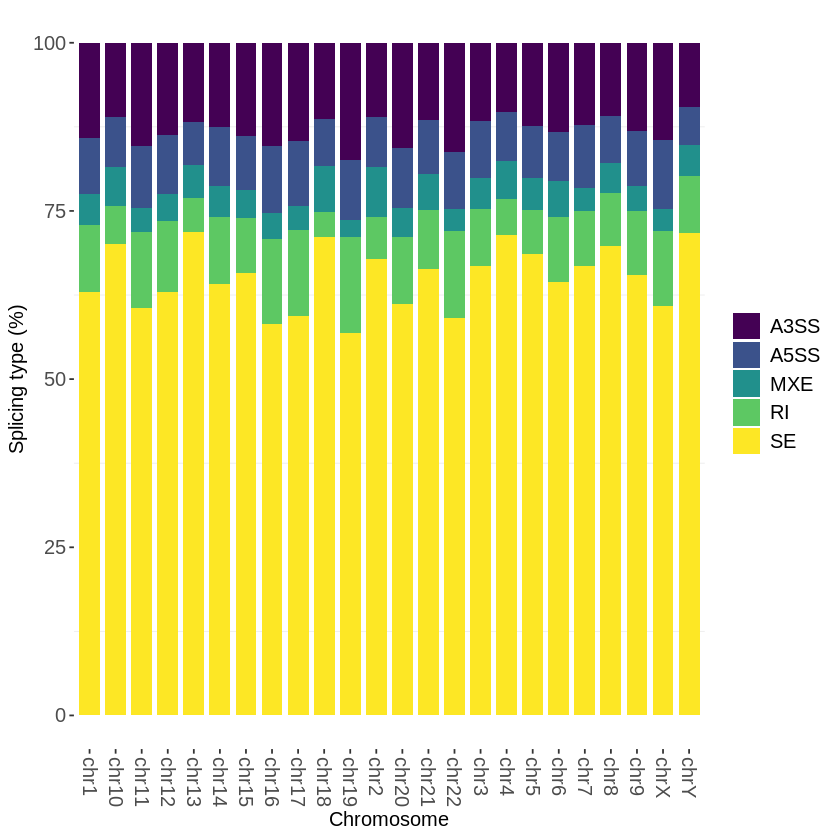

In [205]:
p<-ggplot(df_plot, 
       aes(x=Chr, y=Perc, fill = AStype, by = Chr)) +
  geom_bar(stat = "identity", width = 0.8) +
  theme_bw() +
  theme(axis.text.x = element_text(size=12, angle = 270, hjust = 0.0, vjust = 0.5),
        #axis.ticks.x = element_blank(),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(face="plain", colour="black", size=12),
        axis.title.y = element_text(face="plain", colour="black", size=12),
        legend.title=element_blank(),
        panel.background=element_blank(),
        panel.border=element_blank(),
        panel.grid.major=element_blank(),
        legend.text = element_text(face="plain", colour="black", size=12)
  ) +
  #scale_fill_brewer(palette="Dark2") +
  #scale_fill_manual(values = palette_npg) +
  scale_fill_viridis(discrete=TRUE) +
  ylab("Splicing type (%)") +
  xlab("Chromosome")
p

In [ ]:
ggsave(file = "../pdf/figureSplicingByChromosome.pdf", plot = p)

## ... 
more of the above sequence

## Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### 1. Checksums with the sha256 algorithm

In [206]:
figure_id   = "FigureSplicingByChromosome"

message("Generating sha256 checksums of the artefacts in the `..data/` directory .. ")
system(paste0("cd ../data/ && sha256sum * > ../metadata/", figure_id, "_sha256sums.txt"), intern = TRUE)
message("Done!\n")

data.table::fread(paste0("../metadata/", figure_id, "_sha256sums.txt"), header = FALSE, col.names = c("sha256sum", "file"))

Generating sha256 checksums of the artefacts in the `..data/` directory .. 


character(0)

Done!



sha256sum,file
<chr>,<chr>
5146c849c9354129590c59da5e6040a074523b4827d0975e3f5fa43737af7e9a,README.md


### 2. Libraries metadata

In [207]:
figure_id   = "FigureSplicingByChromosome"

dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", figure_id, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", figure_id ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]

Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..
Done!

Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..
Done!



 setting  value                       
 version  R version 3.6.1 (2019-07-05)
 os       Ubuntu 18.04.3 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language en_US.UTF-8                 
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2020-03-03                  

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
dplyr,dplyr,0.8.4,0.8.4,/opt/conda/lib/R/library/dplyr,/opt/conda/lib/R/library/dplyr,TRUE,FALSE,2020-01-31,CRAN (R 3.6.2),NA,/opt/conda/lib/R/library
forcats,forcats,0.4.0,0.4.0,/opt/conda/lib/R/library/forcats,/opt/conda/lib/R/library/forcats,TRUE,FALSE,2019-02-17,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
ggplot2,ggplot2,3.2.1,3.2.1,/opt/conda/lib/R/library/ggplot2,/opt/conda/lib/R/library/ggplot2,TRUE,FALSE,2019-08-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
magrittr,magrittr,1.5,1.5,/opt/conda/lib/R/library/magrittr,/opt/conda/lib/R/library/magrittr,TRUE,FALSE,2014-11-22,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
purrr,purrr,0.3.3,0.3.3,/opt/conda/lib/R/library/purrr,/opt/conda/lib/R/library/purrr,TRUE,FALSE,2019-10-18,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
readr,readr,1.3.1,1.3.1,/opt/conda/lib/R/library/readr,/opt/conda/lib/R/library/readr,TRUE,FALSE,2018-12-21,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
reshape,reshape,0.8.8,0.8.8,/opt/conda/lib/R/library/reshape,/opt/conda/lib/R/library/reshape,TRUE,FALSE,2018-10-23,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
reshape2,reshape2,1.4.3,1.4.3,/opt/conda/lib/R/library/reshape2,/opt/conda/lib/R/library/reshape2,TRUE,FALSE,2017-12-11,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
stringr,stringr,1.4.0,1.4.0,/opt/conda/lib/R/library/stringr,/opt/conda/lib/R/library/stringr,TRUE,FALSE,2019-02-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
